Columns: ['flight', 'tail_number', 'long', 'lat', 'alt', 'manufacturer', 'model', 'reg_expiration', 'reg_owner', 'reg_city', 'reg_state', 'squawk', 'mph', 'spotted']
✅ Detected 310 anomalies out of 30947 records


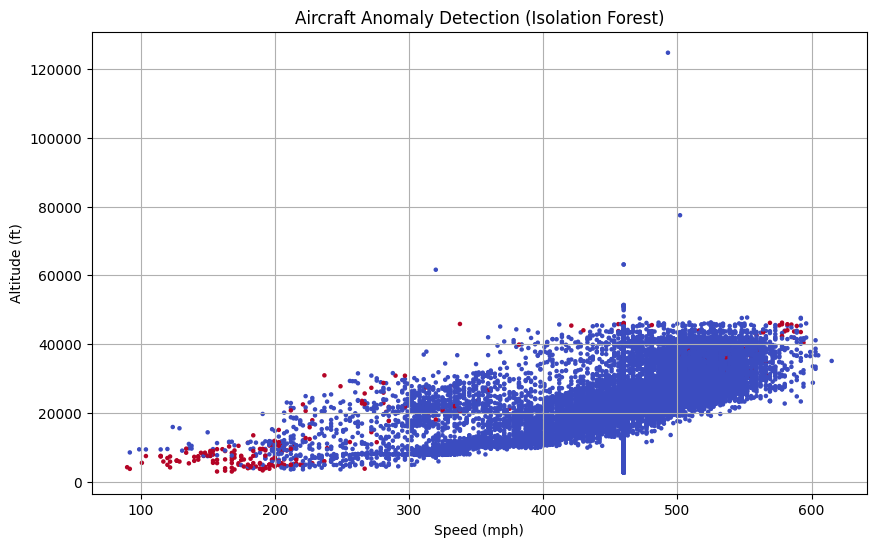

In [10]:
# ✅ Anomaly Detection on ADS-B Data using Isolation Forest (with model.fit)
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\sagni\Downloads\Spacepath Debris Detection\aircraft-data_nov_dec.csv"
df = pd.read_csv(file_path)

# Show available columns
print("Columns:", df.columns.tolist())

# Corrected feature names
features = ['alt', 'mph', 'lat', 'long']

# Drop rows with missing values in selected features
df = df.dropna(subset=features)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X_scaled)  # ✅ THIS LINE WAS MISSING

# Compute anomaly scores and predictions
df['anomaly_score'] = model.decision_function(X_scaled)
df['is_anomaly'] = model.predict(X_scaled)
df['is_anomaly'] = df['is_anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# Print summary
print(f"✅ Detected {df['is_anomaly'].sum()} anomalies out of {len(df)} records")

# Optional: Plot speed vs altitude, color-coded by anomaly
plt.figure(figsize=(10,6))
plt.scatter(df['mph'], df['alt'], c=df['is_anomaly'], cmap='coolwarm', s=5)
plt.xlabel("Speed (mph)")
plt.ylabel("Altitude (ft)")
plt.title("Aircraft Anomaly Detection (Isolation Forest)")
plt.grid(True)
plt.show()
